# Data Exploration
We will first explore the data to have a better understanding of its contents. 

In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
%matplotlib inline
plt.style.use('seaborn')

In [2]:
# Read in and append dataframes
df = pd.DataFrame()
for filename in os.listdir('datasets'):
     df = df.append(pd.read_csv('datasets/' + filename, dtype={'label':str}, na_values='Unspecified'), ignore_index=True)

df.head()

,label,quote,context,author,date,categories,staff
0,barely-true,"“666,000 teachers have been laid off already s...",a virtual roundtable,Joe Biden,"November 18, 2020","Education, Coronavirus",Bill McCarthy
1,barely-true,“David Perdue says he'll do everything in his ...,an ad,Jon Ossoff,"November 17, 2020","Georgia, Negative Campaigning",Tom Kertscher
2,barely-true,Says “47 additional counties used the same sof...,a Facebook post,Ted Nugent,"November 17, 2020","Elections, Facebook Fact-checks",Samantha Putterman
3,barely-true,"""Voter FRAUD exposed in Georgia. Over 2600 vot...",in a Live video,Facebook posts,"November 16, 2020","Georgia, Elections, Facebook Fact-checks",Daniel Funke
4,barely-true,"Says Raphael Warnock ""ran over his wife"" and w...",a tweet,Erick Erickson,"November 13, 2020","Georgia, Candidate Biography, Crime, PunditFact",Tom Kertscher


## Data Cleaning and Processing

In [3]:
# Format date variable and extract information
df['date_formatted'] = pd.to_datetime(df['date'], format='%B %d, %Y')
df['year'] = df['date_formatted'].dt.year.astype('Int64')

## Counts by Year

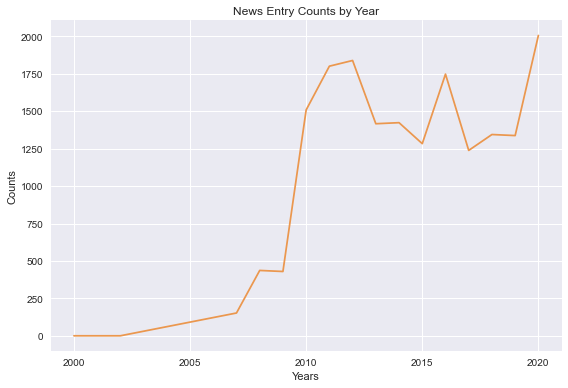

In [4]:
# Plot counts by year
df['year'].value_counts().sort_index().plot(kind='line', xticks=np.arange(2000, 2021, 5), color='#eb974e')
plt.title('News Entry Counts by Year')
plt.xlabel('Years')
plt.ylabel('Counts')
plt.tight_layout()

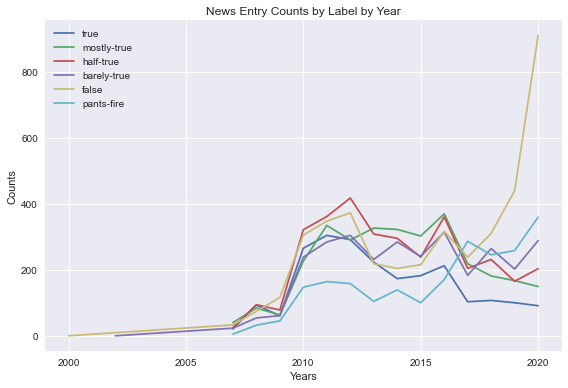

In [5]:
# Plot counts by label by year
r = np.arange(2000, 2021, 5)
df.loc[df['label']=='true', 'year'].value_counts().sort_index().plot(kind='line', xticks=r, label='true')
df.loc[df['label']=='mostly-true', 'year'].value_counts().sort_index().plot(kind='line', xticks=r, label='mostly-true')
df.loc[df['label']=='half-true', 'year'].value_counts().sort_index().plot(kind='line', xticks=r, label='half-true')
df.loc[df['label']=='barely-true', 'year'].value_counts().sort_index().plot(kind='line', xticks=r, label='barely-true')
df.loc[df['label']=='false', 'year'].value_counts().sort_index().plot(kind='line', xticks=r, label='false')
df.loc[df['label']=='pants-fire', 'year'].value_counts().sort_index().plot(kind='line', xticks=r, label='pants-fire')
plt.title('News Entry Counts by Label by Year')
plt.xlabel('Years')
plt.ylabel('Counts')
plt.legend()
plt.tight_layout()

## Counts by Label
**Note:** We observe that there are more `false` news than `true`, which should be taken into consideration during our analyses.

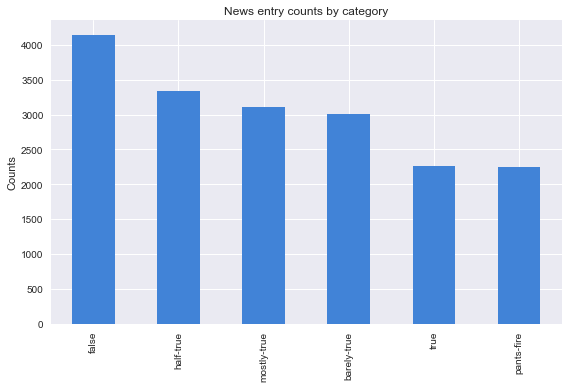

In [6]:
df['label'].value_counts().plot(kind='bar', color='#4183d7')
plt.title('News entry counts by category')
plt.ylabel('Counts')
plt.tight_layout()

## Counts by Author
Top 15 most frequent authors.

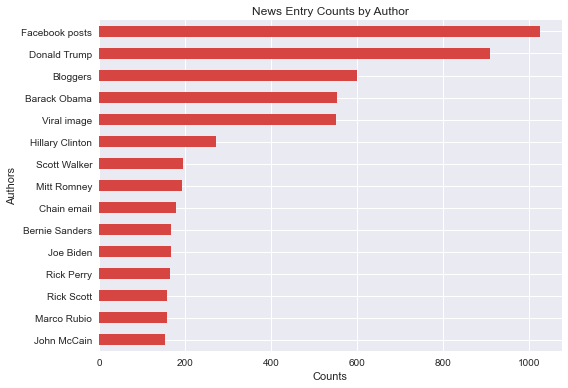

In [7]:
df['author'].value_counts()[:15][::-1].plot.barh(color='#d64541')
plt.title('News Entry Counts by Author')
plt.xlabel('Counts')
plt.ylabel('Authors')
plt.tight_layout()

## Counts by Context
Top 15 most frequent contexts.

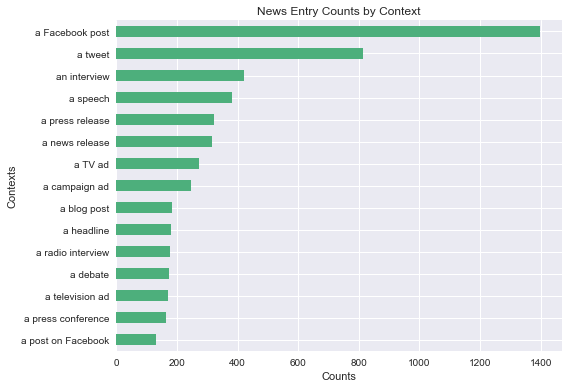

In [8]:
df['context'].value_counts()[:15][::-1].plot.barh(color='#4daf7c')
plt.title('News Entry Counts by Context')
plt.xlabel('Counts')
plt.ylabel('Contexts')
plt.tight_layout()

## Counts by Categories
Top 15 most frequent categories.

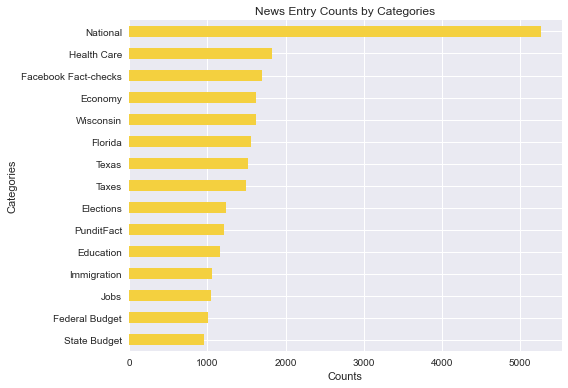

In [9]:
df['categories'].str.split(pat=', ', expand=True).stack().value_counts()[:15][::-1].plot.barh(color='#f4d03f')
plt.title('News Entry Counts by Categories')
plt.xlabel('Counts')
plt.ylabel('Categories')
plt.tight_layout()

## WordCloud

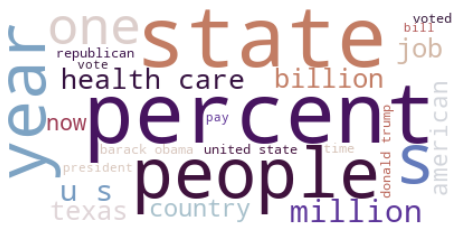

In [10]:
# Concatenate quotes
quotes = " ".join(quote.lower() for quote in df['quote'])

# Set stopwords
stopwords = set(STOPWORDS)
stopwords.add('says')
stopwords.add('said')
stopwords.add('will')

# Generate word cloud
wordcloud = WordCloud(max_font_size=75, max_words=25, stopwords=stopwords, background_color="white", colormap='twilight').generate(quotes)
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()